# **Proyecto final**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Jueves 18 de enero, 9:59pm. **NO HABRÁN PRÓRROGAS**
- Grupos de dos personas por elección libre
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom

El propósito de este proyecto es que tengan un código de su autoría publicado en GitHub

## Página web

> Según lo discutido en la última clase, **deberán crear su propia página web usando GitHub Pages**. En ella, deberán mostrar el notebook de su proyecto final

Recursos adicionales:

1. Videos tutoriales
    - https://www.youtube.com/watch?v=zyGfECfJ9BY
    - https://www.youtube.com/watch?v=K5xImVmm2Ds


2. Plantillas
    - https://bootstrapmade.com/bootstrap-portfolio-templates/
    - https://cssauthor.com/free-bootstrap-portfolio-templates/

Incluya aquí el link de sus páginas web
- Integrante 1: Nestor Canales https://nael97-c.github.io/NestorCanalesAnyosa/
- Integrante 2: Adriana Torres https://adrianatorres3.github.io/

## Aplicación

Pautas generales

- Insumos: deberán trabajar al menos dos (2) bases de datos diferentes que requieran alguna transformación (`data wrangling`). Una de ellas tiene que ser un archivo de texto (`.txt`, `.pdf`, `.docx`, etc)
- Tareas: (i) explicar la relevancia del análisis a desarrollar; (ii) utilizar al menos una vez listas, loops y functions para transformar la base de datos cruda y obtener información relevanete; y (iii) aplicar algoritmos de NLP para transformar texto en datos valiosos
- Deberán proveer obligatoriamente gráficos (2 o más) y tablas/cuadros (2 o más) de su libre elección y conclusiones relevantes

Posibles datos para el ejercicio de `data wrangling`

- Estadísticas de 100 años del BCRP. Más [aquí](https://www.bcrp.gob.pe/en/estadisticas/estadisticas-de-100-anos-del-bcrp.html)
- 1,000 años de datos macroeconómicos en Reino Unido. Más [aquí](https://www.kaggle.com/datasets/bank-of-england/a-millennium-of-macroeconomic-data)
- Historial crediticio - Datathon Interbank 2020. Más [aquí](https://www.kaggle.com/competitions/interbank20/data?select=censo_test.csv)
- Ataques terroristas en el mundo. Más [aquí](https://www.kaggle.com/code/gpreda/global-terrorist-attacks/input)
- [World Hapiness Report 2023](https://worldhappiness.report/), compilado por Carla Solís. Más [aquí](https://raw.githubusercontent.com/ccsuehara/python_para_las_ccss/main/Clase%205/data/world-happiness-report-2023.csv)
- Otros datos del BCRP, MEF, SBS, SMV, BVL, INEI, etc.
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos


Posibles datos para el ejercicio de NLP

- Federal Open Market Committee (FOMC) meetings statements. Más [aquí](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm). El repo incluye tres archivos `.docx`
- Programa Monetario del Banco Central de Reserva del Perú (BCRP). Más [aquí](https://www.bcrp.gob.pe/transparencia/actividades-oficiales/notas-informativas.html). El repo incluye tres archivos `.pdf`
- Mensajes presidenciales de Carla Solís y Luis Eduardo San Martín. [Acá](https://github.com/ccsuehara/Peruvian-presidents-speeches/tree/master/data/presidentialSpeechPeru/txt) los archivos
- "Fake vs real news" de George McIntire. Más info [aquí](https://opendatascience.com/how-to-build-a-fake-news-classification-model/). La base de datos está alojada en su [repo](https://github.com/GeorgeMcIntire/fake_real_news_dataset?tab=readme-ov-file)
- Coronavirus tweets de Kaggle. Más info [aquí](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)
- Twitter Financial News de Kaggle. Más infor [aquí](https://www.kaggle.com/datasets/sulphatet/twitter-financial-news)
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos

1. Ejercicio de data wrangling: Analizaremos la tasa de interés de referencia junto con la inflación interanual del 2004 al 2022, de acuerdo a los datos brindados por el BCRP

La relación entre la tasa de interés de referencia y la inflación interanual en Perú es esencial para la formulación de políticas económicas. Como se sabe, el BCRP utiliza la tasa de interés de referencia como una herramienta clave para controlar la oferta de dinero y, por ende, influir en la actividad económica y la inflación. Ajustes en la tasa de interés afectan la inversión y el consumo, desempeñando un papel crucial en la estabilidad macroeconómica. El análisis de esta relación proporciona insights para tomar decisiones informadas sobre políticas monetarias que buscan mantener la inflación bajo control y estimular el crecimiento económico de manera sostenible.

Esta conexión entre la tasa de interés y la inflación interanual también tiene implicaciones prácticas para inversores y agentes económicos, ya que les permite anticipar cambios en las condiciones financieras y ajustar estrategias en respuesta a las políticas monetarias. En resumen, comprender cómo la tasa de interés de referencia del BCRP afecta la inflación interanual es esencial para la toma de decisiones económicas informadas y la consecución de objetivos macroeconómicos.

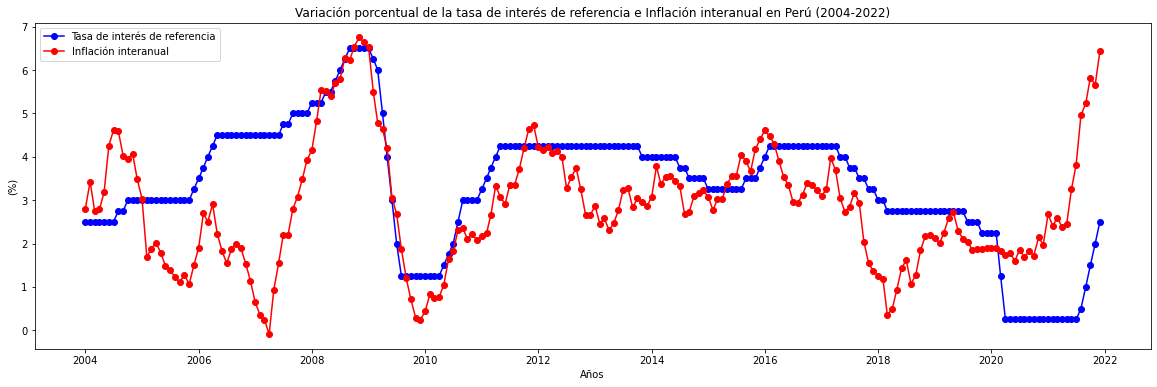

In [31]:
#Importamos las librerías correspondientes
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# hallamos los datos de la tasa de interés de referencia desde el API del BCRP
url_tasa = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD04722MM/json/2004/2022/esp"
response_tasas = requests.get(url_tasa)
data_tasa = response_tasas.json()
tasa_data = [{"month & year": item["name"], "tasa de interés de referencia": float(item["values"][0])} for item in data_tasa["periods"]]
df_tasa = pd.DataFrame(tasa_data) #obtuvimos el Dataframe de la la tasa de interes de referencia

# hallamos los datos de la inflación interanual desde el API del BCRP
url_inflacion = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01273PM/json/2004/2022/esp"
response_inflacion = requests.get(url_inflacion)
data_inflacion = response_inflacion.json()
inflacion_data = [{"month & year": item["name"], "inflacion": float(item["values"][0])} for item in data_inflacion["periods"]]
df_inflacion = pd.DataFrame(inflacion_data) #obtuvimos el Dataframe de la inflacion interanual

#Es necesario traducir al inglés los meses del año para un mejor análisis, veamos:
month_change = {
    'Ene': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dic': 'Dec'
}

# Desde una función, pasamos a convertir los nombres de los meses al inglés
def convert_month_name(date_str):
    for esp, eng in month_change.items():
        date_str = date_str.replace(esp, eng)
    return date_str

# Colocamos la función a la columna 'month & year'
df_tasa['month & year'] = df_tasa['month & year'].apply(convert_month_name)
df_inflacion['month & year'] = df_inflacion['month & year'].apply(convert_month_name)

# Convertimos la columna 'month & year' a formato datetime
df_tasa['month & year'] = pd.to_datetime(df_tasa['month & year'], format='%b.%Y')
df_inflacion['month & year'] = pd.to_datetime(df_inflacion['month & year'], format='%b.%Y')

# Ordenamos adecuadamente el DataFrame por fecha
df_tasa.sort_values('month & year', inplace=True)
df_inflacion.sort_values('month & year', inplace=True)

# Creamos un único DataFrame combinando ambas tasas
df_combined = pd.merge(df_tasa, df_inflacion, on='month & year', how='outer')

# Creamos el gráfico combinado
fig, ax1 = plt.subplots(figsize=(20, 6))

# Graficamos las tasas de interés de referencia y la inflación interanual en el mismo eje izquierdo
ax1.plot(df_combined['month & year'], df_combined['tasa de interés de referencia'], label='Tasa de interés de referencia', color='blue', marker='o')
ax1.plot(df_combined['month & year'], df_combined['inflacion'], label='Inflación interanual', color='red', marker='o')

# Configuramos leyendas y título
ax1.legend(loc='upper left')
plt.title('Variación porcentual de la tasa de interés de referencia e Inflación interanual en Perú (2004-2022)')

# Agregar nombres de ejes
ax1.set_xlabel('Años')
ax1.set_ylabel('(%)')

# Mostrar el gráfico
plt.show()



Análisis del gráfico: 

La evolución de la Tasa de Interés de Referencia y la Inflación interanual, según los datos del BCRP, revela patrones interesantes. Durante los primeros años estudiados, especialmente a mediados del 2005, la tasa de referencia superó la inflación, indicando una política monetaria restrictiva. Sin embargo, pasado el 2008, ambas tasas experimentaron una disminución, posiblemente como respuesta a la crisis financiera global. A partir del 2010, se observa una relativa estabilidad hasta el 2020, donde la inflación supera a la tasa de referencia.  Este cambio se debe a los cambios económicos que ocurrieron a nivel mundial por la pandemia. Cabe destacar que, a pesar de las continuas fluctuaciones de ambos indicadores, la tasa de interés de referencia se mantuvo por encima de la inflación interanual hasta el 2020.

A raíz de la covid-19, la disminución de la tasa de referencia en 2020 podría haber sido una respuesta a la necesidad de facilitar el acceso al crédito y estimular la inversión en un entorno de incertidumbre económica. Por otro lado, la inflación interanual pudo haber reflejado tanto la caída en la demanda como las presiones inflacionarias derivadas de la interrupción de las cadenas de suministro y cambios en los patrones de consumo. Este análisis destaca cómo eventos extraordinarios, como la pandemia, pueden influir en la dinámica macroeconómica y la toma de decisiones de política monetaria.

2. Ejercicio de NLP

In [32]:
fomc_2023_02_01 = "The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. In support of these goals, the Committee decided to raise the target range for the federal funds rate to 4-1/2 to 4-3/4 percent. The Committee anticipates that ongoing increases in the target range will be appropriate in order to attain a stance of monetary policy that is sufficiently restrictive to return inflation to 2 percent over time. In determining the extent of future increases in the target range, the Committee will take into account the cumulative tightening of monetary policy, the lags with which monetary policy affects economic activity and inflation, and economic and financial developments. In addition, the Committee will continue reducing its holdings of Treasury securities and agency debt and agency mortgage-backed securities, as described in its previously announced plans. The Committee is strongly committed to returning inflation to its 2 percent objective."
fomc_2023_03_22 = "The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. In support of these goals, the Committee decided to raise the target range for the federal funds rate to 4-3/4 to 5 percent. The Committee will closely monitor incoming information and assess the implications for monetary policy. The Committee anticipates that some additional policy firming may be appropriate in order to attain a stance of monetary policy that is sufficiently restrictive to return inflation to 2 percent over time. In determining the extent of future increases in the target range, the Committee will take into account the cumulative tightening of monetary policy, the lags with which monetary policy affects economic activity and inflation, and economic and financial developments. In addition, the Committee will continue reducing its holdings of Treasury securities and agency debt and agency mortgage-backed securities, as described in its previously announced plans. The Committee is strongly committed to returning inflation to its 2 percent objective."
fomc_2023_05_03 = "The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. In support of these goals, the Committee decided to raise the target range for the federal funds rate to 5 to 5-1/4 percent. The Committee will closely monitor incoming information and assess the implications for monetary policy. In determining the extent to which additional policy firming may be appropriate to return inflation to 2 percent over time, the Committee will take into account the cumulative tightening of monetary policy, the lags with which monetary policy affects economic activity and inflation, and economic and financial developments. In addition, the Committee will continue reducing its holdings of Treasury securities and agency debt and agency mortgage-backed securities, as described in its previously announced plans. The Committee is strongly committed to returning inflation to its 2 percent objective."
fomc_2023_06_14 = "The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. In support of these goals, the Committee decided to maintain the target range for the federal funds rate at 5 to 5-1/4 percent. Holding the target range steady at this meeting allows the Committee to assess additional information and its implications for monetary policy. In determining the extent of additional policy firming that may be appropriate to return inflation to 2 percent over time, the Committee will take into account the cumulative tightening of monetary policy, the lags with which monetary policy affects economic activity and inflation, and economic and financial developments. In addition, the Committee will continue reducing its holdings of Treasury securities and agency debt and agency mortgage-backed securities, as described in its previously announced plans. The Committee is strongly committed to returning inflation to its 2 percent objective."
fomc_2023_07_26 = "The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. In support of these goals, the Committee decided to raise the target range for the federal funds rate to 5-1/4 to 5-1/2 percent. The Committee will continue to assess additional information and its implications for monetary policy. In determining the extent of additional policy firming that may be appropriate to return inflation to 2 percent over time, the Committee will take into account the cumulative tightening of monetary policy, the lags with which monetary policy affects economic activity and inflation, and economic and financial developments. In addition, the Committee will continue reducing its holdings of Treasury securities and agency debt and agency mortgage-backed securities, as described in its previously announced plans. The Committee is strongly committed to returning inflation to its 2 percent objective."
fomc_2023_09_20 = "The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. In support of these goals, the Committee decided to maintain the target range for the federal funds rate at 5-1/4 to 5-1/2 percent. The Committee will continue to assess additional information and its implications for monetary policy. In determining the extent of additional policy firming that may be appropriate to return inflation to 2 percent over time, the Committee will take into account the cumulative tightening of monetary policy, the lags with which monetary policy affects economic activity and inflation, and economic and financial developments. In addition, the Committee will continue reducing its holdings of Treasury securities and agency debt and agency mortgage-backed securities, as described in its previously announced plans. The Committee is strongly committed to returning inflation to its 2 percent objective."
fomc_2023_11_01 = "The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. In support of these goals, the Committee decided to maintain the target range for the federal funds rate at 5-1/4 to 5-1/2 percent. The Committee will continue to assess additional information and its implications for monetary policy. In determining the extent of additional policy firming that may be appropriate to return inflation to 2 percent over time, the Committee will take into account the cumulative tightening of monetary policy, the lags with which monetary policy affects economic activity and inflation, and economic and financial developments. In addition, the Committee will continue reducing its holdings of Treasury securities and agency debt and agency mortgage-backed securities, as described in its previously announced plans. The Committee is strongly committed to returning inflation to its 2 percent objective."
fomc_2023_12_13 = "The Committee seeks to achieve maximum employment and inflation at the rate of 2 percent over the longer run. In support of these goals, the Committee decided to maintain the target range for the federal funds rate at 5-1/4 to 5-1/2 percent. The Committee will continue to assess additional information and its implications for monetary policy. In determining the extent of any additional policy firming that may be appropriate to return inflation to 2 percent over time, the Committee will take into account the cumulative tightening of monetary policy, the lags with which monetary policy affects economic activity and inflation, and economic and financial developments. In addition, the Committee will continue reducing its holdings of Treasury securities and agency debt and agency mortgage-backed securities, as described in its previously announced plans. The Committee is strongly committed to returning inflation to its 2 percent objective."

In [33]:
import re

In [34]:
patron1 = r'(\d+-\d+/\d+) to (\d+-\d+/\d+)'
resultados_1 = re.search(patron1, fomc_2023_02_01)

if resultados_1:
    elemento1 = resultados_1.group(1)
    elemento2 = resultados_1.group(2)
    elementos_1_2 = [elemento1, elemento2]

    print(elementos_1_2)
else:
    print("No se encontraron coincidencias.")

['4-1/2', '4-3/4']


In [35]:
patron2 = r'(\d+-\d+/\d+) to (\d)'
resultados_2 = re.search(patron2, fomc_2023_03_22)

if resultados_2:
    elemento3 = resultados_2.group(1)
    elemento4 = resultados_2.group(2)
    elementos_3_4 = [elemento3, elemento4]

    print(elementos_3_4)
else:
    print("No se encontraron coincidencias.")

['4-3/4', '5']


In [36]:
patron3 = r'(\d) to (\d+-\d+/\d+)'
resultados_3 = re.search(patron3, fomc_2023_05_03)

if resultados_3:
    elemento5 = resultados_3.group(1)
    elemento6 = resultados_3.group(2)
    elementos_5_6 = [elemento5, elemento6]

    print(elementos_5_6)
else:
    print("No se encontraron coincidencias.")

['5', '5-1/4']


In [37]:
resultados_4 = re.search(patron3, fomc_2023_06_14)

if resultados_4:
    elemento7 = resultados_4.group(1)
    elemento8 = resultados_4.group(2)
    elementos_7_8 = [elemento7, elemento8]

    print(elementos_7_8)
else:
    print("No se encontraron coincidencias.")

['5', '5-1/4']


In [38]:
resultados_5 = re.search(patron1, fomc_2023_07_26)

if resultados_5:
    elemento9 = resultados_5.group(1)
    elemento10 = resultados_5.group(2)
    elementos_9_10 = [elemento9, elemento10]

    print(elementos_9_10)
else:
    print("No se encontraron coincidencias.")

['5-1/4', '5-1/2']


In [39]:
resultados_6 = re.search(patron1, fomc_2023_09_20)

if resultados_6:
    elemento11 = resultados_6.group(1)
    elemento12 = resultados_6.group(2)
    elementos_11_12 = [elemento11, elemento12]

    print(elementos_11_12)
else:
    print("No se encontraron coincidencias.")

['5-1/4', '5-1/2']


In [40]:
resultados_7 = re.search(patron1, fomc_2023_11_01)

if resultados_7:
    elemento13 = resultados_7.group(1)
    elemento14 = resultados_7.group(2)
    elementos_13_14 = [elemento13, elemento14]

    print(elementos_13_14)
else:
    print("No se encontraron coincidencias.")

['5-1/4', '5-1/2']


In [41]:
resultados_8 = re.search(patron1, fomc_2023_12_13)

if resultados_8:
    elemento15 = resultados_8.group(1)
    elemento16 = resultados_8.group(2)
    elementos_15_16 = [elemento15, elemento16]

    print(elementos_15_16)
else:
    print("No se encontraron coincidencias.")

['5-1/4', '5-1/2']


In [42]:
# Función para imprimir el tipo de cada elemento en una lista
def imprimir_tipos(lista):
    for elemento in lista:
        print(f"Tipo de '{elemento}': {type(elemento)}")

# Imprimir tipos para cada lista
print("Tipos para elementos_1_2:")
imprimir_tipos(elementos_1_2)

print("\nTipos para elementos_3_4:")
imprimir_tipos(elementos_3_4)

print("\nTipos para elementos_5_6:")
imprimir_tipos(elementos_5_6)

print("\nTipos para elementos_7_8:")
imprimir_tipos(elementos_7_8)

print("\nTipos para elementos_9_10:")
imprimir_tipos(elementos_9_10)

print("\nTipos para elementos_11_12:")
imprimir_tipos(elementos_11_12)

print("\nTipos para elementos_13_14:")
imprimir_tipos(elementos_13_14)

print("\nTipos para elementos_15_16:")
imprimir_tipos(elementos_15_16)

Tipos para elementos_1_2:
Tipo de '4-1/2': <class 'str'>
Tipo de '4-3/4': <class 'str'>

Tipos para elementos_3_4:
Tipo de '4-3/4': <class 'str'>
Tipo de '5': <class 'str'>

Tipos para elementos_5_6:
Tipo de '5': <class 'str'>
Tipo de '5-1/4': <class 'str'>

Tipos para elementos_7_8:
Tipo de '5': <class 'str'>
Tipo de '5-1/4': <class 'str'>

Tipos para elementos_9_10:
Tipo de '5-1/4': <class 'str'>
Tipo de '5-1/2': <class 'str'>

Tipos para elementos_11_12:
Tipo de '5-1/4': <class 'str'>
Tipo de '5-1/2': <class 'str'>

Tipos para elementos_13_14:
Tipo de '5-1/4': <class 'str'>
Tipo de '5-1/2': <class 'str'>

Tipos para elementos_15_16:
Tipo de '5-1/4': <class 'str'>
Tipo de '5-1/2': <class 'str'>


In [43]:
from fractions import Fraction

def convertir_a_float(elemento):
    partes = elemento.split('-')
    
    if len(partes) == 2:
        # Si hay dos partes después de dividir por "-", convertir a float
        entero = float(partes[0])
        fraccion = float(Fraction(partes[1]))
        return entero + fraccion
    elif len(partes) == 3:
        # Si hay tres partes después de dividir por "-", convertir a float
        entero = float(partes[0])
        fraccion = float(Fraction(partes[2]))
        return entero + fraccion
    elif len(partes) == 1:
        # Si hay una sola parte, intentar convertir a float directamente
        try:
            return float(partes[0])
        except ValueError:
            return None
    else:
        # Si no se cumple ninguna condición, devolver None o manejar según sea necesario
        return None

# Convertir elementos a float
elementos_1_2_float = [convertir_a_float(elem) for elem in elementos_1_2]
elementos_3_4_float = [convertir_a_float(elem) for elem in elementos_3_4]
elementos_5_6_float = [convertir_a_float(elem) for elem in elementos_5_6]
elementos_7_8_float = [convertir_a_float(elem) for elem in elementos_7_8]
elementos_9_10_float = [convertir_a_float(elem) for elem in elementos_9_10]
elementos_11_12_float = [convertir_a_float(elem) for elem in elementos_11_12]
elementos_13_14_float = [convertir_a_float(elem) for elem in elementos_13_14]
elementos_15_16_float = [convertir_a_float(elem) for elem in elementos_15_16]

# Imprimir los resultados
print("Elementos 1 y 2 como float:", elementos_1_2_float)
print("Elementos 3 y 4 como float:", elementos_3_4_float)
print("Elementos 5 y 6 como float:", elementos_5_6_float)
print("Elementos 7 y 8 como float:", elementos_7_8_float)
print("Elementos 9 y 10 como float:", elementos_9_10_float)
print("Elementos 11 y 12 como float:", elementos_11_12_float)
print("Elementos 13 y 14 como float:", elementos_13_14_float)
print("Elementos 15 y 16 como float:", elementos_15_16_float)

Elementos 1 y 2 como float: [4.5, 4.75]
Elementos 3 y 4 como float: [4.75, 5.0]
Elementos 5 y 6 como float: [5.0, 5.25]
Elementos 7 y 8 como float: [5.0, 5.25]
Elementos 9 y 10 como float: [5.25, 5.5]
Elementos 11 y 12 como float: [5.25, 5.5]
Elementos 13 y 14 como float: [5.25, 5.5]
Elementos 15 y 16 como float: [5.25, 5.5]


In [44]:
import pandas as pd

# Crear un DataFrame con los valores mínimos y máximos y las fechas
data = {
    "Fecha": ["2023-02-01", "2023-03-22", "2023-05-03", "2023-06-14", "2023-07-26", "2023-09-20", "2023-11-01", "2023-12-13"],
    "Valor Mínimo": [4.5, 4.75, 5.0, 5.0, 5.25, 5.25, 5.25, 5.25],
    "Valor Máximo": [4.75, 5.0, 5.25, 5.25, 5.5, 5.5, 5.5, 5.5]
}

df = pd.DataFrame(data)

# Imprimir el DataFrame
df

,Fecha,Valor Mínimo,Valor Máximo
0,2023-02-01,4.50,4.75
1,2023-03-22,4.75,5.00
2,2023-05-03,5.00,5.25
3,2023-06-14,5.00,5.25
4,2023-07-26,5.25,5.50
5,2023-09-20,5.25,5.50
6,2023-11-01,5.25,5.50
7,2023-12-13,5.25,5.50


In [45]:
df["Promedio"] = (df["Valor Mínimo"] + df["Valor Máximo"]) / 2
df

,Fecha,Valor Mínimo,Valor Máximo,Promedio
0,2023-02-01,4.50,4.75,4.625
1,2023-03-22,4.75,5.00,4.875
2,2023-05-03,5.00,5.25,5.125
3,2023-06-14,5.00,5.25,5.125
4,2023-07-26,5.25,5.50,5.375
5,2023-09-20,5.25,5.50,5.375
6,2023-11-01,5.25,5.50,5.375
7,2023-12-13,5.25,5.50,5.375


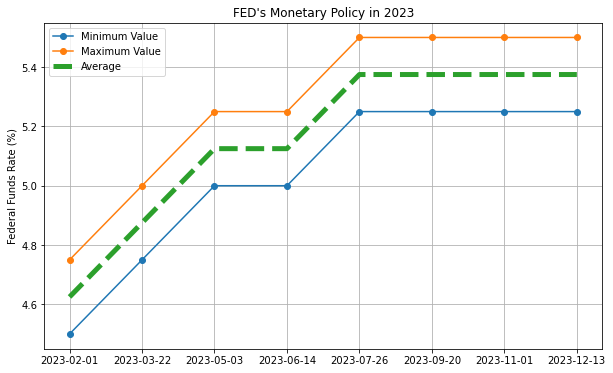

In [46]:
import matplotlib.pyplot as plt

# Graficar el DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df["Fecha"], df["Valor Mínimo"], marker='o', label="Minimum Value")
plt.plot(df["Fecha"], df["Valor Máximo"], marker='o', label="Maximum Value")
plt.plot(df["Fecha"], df["Promedio"], linestyle='--', label="Average", linewidth=5)
plt.ylabel("Federal Funds Rate (%)")
plt.title("FED's Monetary Policy in 2023")
plt.legend()
plt.grid(True)
plt.show()

En este gráfico, se puede observar que las tasas de interés han aumentado durante la primera mitad del año 2023 con un ligero comportamiento estable entre mayo y junio; mientras que en la segunda mitad del año se puede apreciar un comportamiento estable. Según los informes con los que se construyó la base de datos, la invasión rusa a Ucrania ha contribuido con elevar la incertidumbre global, por lo que podría incentivar a que la inflación crezca. Por ello, y por una tasa de inflación previa alta, la FED empezó en febrero a aumentar el rango de la tasa de interés. En marzo y mayo, la inflación aún seguía alta, por lo que se decidió aumentar el rango de la tasa de interés en esos meses. En junio, se decide que el rango de la tasa de interés permanezca igual aunque la inflación se considere aún alta. Sin embargo, recién en julio se decide aumentar el rango por la alta tasa de inflación. En los siguientes meses, el rango permanece estable a pesar de la alta inflación.

 Se aclara que, aunque la FED tenga como objetivo reducir la inflación y garantizar el pleno empleo, este último no ha sido el objetivo de la FED durante el 2023 porque la tasa de desempleo ha permanecido baja. Es importante destacar que la relevancia de la información de este año consiste en complementarse con los de periodos anteriores para analizar mejor la evolución del rango de las tasas y podría servir para predecir a través de la econometría o Machine Learning. Asimismo, puede complementarse este análisis con análisis de otros indicadores económicos o financieros como el rendimiento del mercado de valores o las tasas hipotecarias.